In [1]:
library(haven)

ENAHO_2014 <- read_sav(".\\data\\enaho\\ENAHO 2014.sav")
ENAHO_2015 <- read_sav(".\\data\\enaho\\ENAHO 2015.sav")
ENAHO_2016 <- read_sav(".\\data\\enaho\\ENAHO 2016.sav")
ENAHO_2017 <- read_sav(".\\data\\enaho\\ENAHO 2017.sav")

In [2]:
cop2014 = ENAHO_2014
cop2015 = ENAHO_2015
cop2016 = ENAHO_2016
cop2017 = ENAHO_2017

cop2014= cop2014[!is.na(cop2014$np), ]
cop2015= cop2015[!is.na(cop2015$np), ]
cop2016= cop2016[!is.na(cop2016$np), ]
cop2017= cop2017[!is.na(cop2017$np), ]

commonVariables = intersect(intersect(intersect(names(cop2014), names(cop2015)), names(cop2016)), names(cop2017))
table(sapply(ENAHO_2017, function(col) class(col)))


labelled  numeric 
     449      124 

In [3]:
cop2014 = cop2014[,commonVariables]
cop2015 = cop2015[,commonVariables]
cop2016 = cop2016[,commonVariables]
cop2017 = cop2017[,commonVariables]

In [4]:
library(dplyr)
#install.packages("labelled")
library(labelled)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
varToNum = c("V9","TamHog","A5")
varToCat = c("V21A","A3","Escolari","A17","B8","C5B","RamaEmpPri","C11","C16B",
             "C16C","D4B","D4C","RamaEmpSec","RamaUltEmpCesant","G12",
             "RamaFuerzaTrab","OcupFuerzaTrab","ActNoMer")
varToZero = c("V2A1","V2B","V18A1","A9B","A19B","C2A1","C2A2","C2A3","C2A4",
              "C2B1","C2B2","C2B3","C2B4","HorNorPri","HorNorSec","HorTotNorm",
              "HorEfePri","HorEfeSec","HorTotEfe","C10","D13B","D13C1","D13D",
              "D13E","D14A","D14B","D14C","D14F","D15A","D15B","D15C","D15E",
              "D16","D17","D17A","E3B","E3C","E5A","E5B","E11B","E12A",
              "E13A1","E13B1","E13C1","E13D1","E13E1","E14A1","E14B1","E14C1",
              "E14D1","E15A","E15B","E15B1","F4","F5","F10A","F10C","F11A",
              "F11B","F13A","F14B","F15B","G3","G4A","G5","H1B","H1D","H1F","H2B",
              "H2C","H3B","H4B","H5B","H9A1","H9B1","H9C1","H9D1","H9E1","H9F1",
              "H9G1","H9H1","H9I1","H9K1","H9L1","H9M1","H10C")

varCateg = c("ID_HOGAR","ID_VIVIENDA","V13B","V14A1","V14B","V18B1","V18F1","V18G1",
             "V18I1","V18J1","V18K1","V18L1","V18M1","V19B","V19C","A9C","A12",
             "A13","A14","A15A","A15B","NivInst","REZ_ESC","ForReg","A16B",
             "A18A","A18B","A18C","A19A","A19C","A20A","ForNoReg","A21","A22A",
             "A22B","A23","B1","B2","B3","B4","B5","B6","B7A","B7B","B7C","B7D",
             "B7E","B7F","B7G","B7H","B7I","B7J","B7K","B7L","CondAct","OcupPrest",
             "C1","NumEmpl","C3","C4A","C4B","C5A","C6A","C6B","SecInsPri","C7B",
             "C7C","C7C1","OcupEmpPri","C12","PosiEmpPri","C13A","C13B","C13C","C13D",
             "C13E","C13F","C13F1","C13G","C14","C15","C16A","C17","Sub40Hor","SubSinHor",
             "InsLab","Estabili","D1","D2","D3","D4A","D7","D8A","D8B1","D8B2","D8B3","D8B4",
             "ContProv","D9","D10","D11","D12","D13A","D13C","D14D","D14E","D15A1","D15B1",
             "D15C1","D15D","D15E1","D19","E1","E2","E3A","E4A","E4B","FlexiHorLab","E6A","E6B",
             "E6C","E6D","E6E","E6F","E7","E7A","E8A","E8B","E9A","E9B","E9C","E9D",
             "E9E","E10A","E10B","E10C","E11A","E12B","E12C","E13A","E13B","E13C","E13D","E13E",
             "E14A","E14A2","E14B","E14B2","E14C","E14C2","E14D","E14D2","E17","SecInsSec",
             "OcupEmpSec","F4A","F6","F7","PosiEmpSec","F8","F9","F10","F10B","F10B1","F10D",
             "F11A1","F11B1","F12A","F12B","F12C","F13B","F13C","F14A","F15A","F15B1","G1","G2",
             "G4B","G4C","G6","SecInsCesa","OcupUltEmpCesant","G10","PosiUltCesa","G11","SecFuerzaTrab",
             "PosiFuerzaTrab","H1A","H1C","H1E","H2A","H3A","H4A","H5A","H6A","H6B","H6C","H6D","H6E",
             "H6F","TrabDomNoRem","ActPrimAutCon","OtroActAutCon","ActComVol","RazNoActEco","H9A","H9A2",
             "H9B","H9B2","H9C","H9C2","H9D","H9D2","H9E","H9E2","H9F","H9F2","H9G","H9G2","H9H","H9H2","H9I",
             "H9I2","H9K","H9K2","H9L","H9L2","H9M","H9M2","H10A","H10B","H10C1","Q_IPCN","D_IPCN")

In [6]:
#NUMERALS
cop2014[,varToNum] = lapply(cop2014[,varToNum], function(col) as.numeric(col))
cop2015[,varToNum] = lapply(cop2015[,varToNum], function(col) as.numeric(col))
cop2016[,varToNum] = lapply(cop2016[,varToNum], function(col) as.numeric(col))
cop2017[,varToNum] = lapply(cop2017[,varToNum], function(col) as.numeric(col))
    
table(sapply(cop2017, function(col) class(col)))


labelled  numeric 
     400      116 

In [7]:
#CATEGORICAL
cop2014[,varToCat] = lapply(cop2014[,varToCat], function(col) replace(col, is.na(col), 9999999999))
cop2015[,varToCat] = lapply(cop2015[,varToCat], function(col) replace(col, is.na(col), 9999999999))
cop2016[,varToCat] = lapply(cop2016[,varToCat], function(col) replace(col, is.na(col), 9999999999))
cop2017[,varToCat] = lapply(cop2017[,varToCat], function(col) replace(col, is.na(col), 9999999999))

table(sapply(cop2017, function(col) class(col)))


labelled  numeric 
     400      116 

In [8]:
#To ZERO AND THEN TO NUM
cop2014[,varToZero] = lapply(cop2014[,varToZero], function(col) replace(col, is.na(col), 9999999999))
cop2015[,varToZero] = lapply(cop2015[,varToZero], function(col) replace(col, is.na(col), 9999999999))
cop2016[,varToZero] = lapply(cop2016[,varToZero], function(col) replace(col, is.na(col), 9999999999))
cop2017[,varToZero] = lapply(cop2017[,varToZero], function(col) replace(col, is.na(col), 9999999999))

cop2014[,varToZero] = lapply(cop2014[,varToZero], function(col) as.numeric(col))
cop2015[,varToZero] = lapply(cop2015[,varToZero], function(col) as.numeric(col))
cop2016[,varToZero] = lapply(cop2016[,varToZero], function(col) as.numeric(col))
cop2017[,varToZero] = lapply(cop2017[,varToZero], function(col) as.numeric(col))

    
table(sapply(cop2017, function(col) class(col)))


labelled  numeric 
     314      202 

In [9]:
#THE REST OF THE CATEGORICAL VARIABLES

cop2014[,varCateg] = lapply(cop2014[,varCateg], function(col) replace(col, is.na(col), 9999999999))
cop2015[,varCateg] = lapply(cop2015[,varCateg], function(col) replace(col, is.na(col), 9999999999))
cop2016[,varCateg] = lapply(cop2016[,varCateg], function(col) replace(col, is.na(col), 9999999999))
cop2017[,varCateg] = lapply(cop2017[,varCateg], function(col) replace(col, is.na(col), 9999999999))

In [10]:
# OTHER NUMERICAL VARIABLES
cop2014[is.na(cop2014$R4B),"R4B"] = 0
cop2014[is.na(cop2014$D10A),"D10A"] = 0
cop2014[is.na(cop2014$F8A),"F8A"] = 0

cop2015[is.na(cop2015$R4B),"R4B"] = 0
cop2015[is.na(cop2015$D10A),"D10A"] = 0
cop2015[is.na(cop2015$F8A),"F8A"] = 0

cop2016[is.na(cop2016$R4B),"R4B"] = 0
cop2016[is.na(cop2016$D10A),"D10A"] = 0
cop2016[is.na(cop2016$F8A),"F8A"] = 0

cop2017[is.na(cop2017$R4B),"R4B"] = 0
cop2017[is.na(cop2017$D10A),"D10A"] = 0
cop2017[is.na(cop2017$F8A),"F8A"] = 0

table(sapply(cop2017, function(col) class(col)))


labelled  numeric 
     314      202 

In [11]:
#Labeled to factor
cop2014 = cop2014 %>% mutate_if(is.labelled, funs(as.factor(.)))
cop2015 = cop2015 %>% mutate_if(is.labelled, funs(as.factor(.)))
cop2016 = cop2016 %>% mutate_if(is.labelled, funs(as.factor(.)))
cop2017 = cop2017 %>% mutate_if(is.labelled, funs(as.factor(.)))

table(sapply(cop2017, function(col) class(col)))


 factor numeric 
    314     202 

In [12]:
cop2014 = cop2014[, sapply(cop2014, function(col) length(levels(col))) != 1]

cop2015 = cop2015[, sapply(cop2015, function(col) length(levels(col))) != 1]

cop2016 = cop2016[, sapply(cop2016, function(col) length(levels(col))) != 1]

cop2017 = cop2017[, sapply(cop2017, function(col) length(levels(col))) != 1]

In [13]:
table(sapply(cop2017, function(col) class(col)))


 factor numeric 
    314     202 

In [14]:
library(ggplot2)

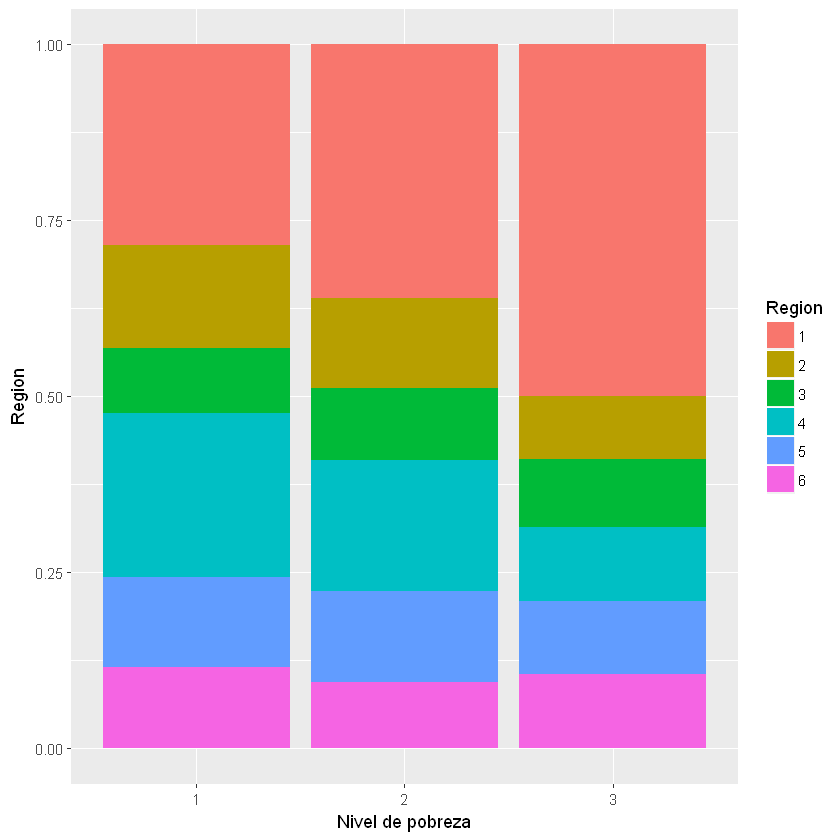

In [15]:
ggplot(as.data.frame(prop.table(table(cop2014$REGION, cop2014$np), 2)), aes(x=Var2, y = Freq, fill=Var1)) +
     geom_bar(stat="identity") + xlab("Nivel de pobreza") + ylab("Region") + 
     guides(fill=guide_legend(title="Region"))

In [16]:
povLevelTables = cbind(table(cop2014$np)/nrow(cop2014), table(cop2015$np)/nrow(cop2015), 
                       table(cop2016$np)/nrow(cop2016), table(cop2017$np)/nrow(cop2017))
colnames(povLevelTables) = c(2014,2015,2016,2017)

povLevelTables

,2014,2015,2016,2017
1,0.09149219,0.08304452,0.07602513,0.06611451
2,0.19080646,0.16256952,0.16247766,0.16466799
3,0.71770135,0.75438596,0.76149721,0.76921750


In [17]:
varVivienda = c("REGION","ZONA","V1","V2A","V2A1","V2B","V3","V4","V5","V6","V6A","V7A","V7B","V7C","EFI",
                "CalViv","V8","HacDor","V9","HacApo","V10","V11","V12","V13A","V13B","V14A","V14A1","V14B",
                "V15","V16","V17A","V17B1","V17B2","V17B3","V17B4","V17B5","V17B6","SerBa","V18A","V18A1",
                "V18B","V18B1","V18C","V18D","V18E","V18F","V18F1","V18G","V18G1","V18H","V18I","V18I1",
                "V18J","V18J1","V18K","V18K1","V18L","V18L1","V18M","V18M1","V19",
                "V19B","V19C","V21","V21A")

varCondRes = c("R4A","R4B","R4H1","R4H2","R4H3","R4M1","R4M2","R4M3","R4T1","R4T2","R4T3","TamHog","TamViv")

varCaracSoc = c("A3","A4","A5","A6","LugNac","CondMig","RegNac","RegResAnt","A8A","A8B","A9A","A9B","A9C",
                "A10A","A10B","A11","A12","A13","A14","A15A","A15B","NivInst","Escolari","REZ_ESC",
                "ForReg","A16B","A17","A18A","A18B","A18C","A19A","A19B","A19C","A20A","ForNoReg",
                "A21","A22A","A22B","A23")

varCondAct = c("B1","B2","B3","B4","B5","B6","B7A","B7B","B7C","B7D","B7E","B7F","B7G","B7H","B7I","B7J",
               "B7K","B8","CondAct","OcupPrest")

varPerOcup = c("C1","NumEmpl","C2A1","C2A2","C2A3","C2A4","C2B1","C2B2","C2B3","C2B4","HorNorPri","HorNorSec",
               "HorTotNorm","HorEfePri","HorEfeSec","HorTotEfe","C3","C4A","C4B","C5A","C5B","C6A","C6B",
               "SecInsPri","C7B","C7C","C7C1","RamaEmpPri","OcupEmpPri","C10","C11","C12","PosiEmpPri","C13A",
               "C13B","C13C","C13D","C13E","C13F","C13F1","C13G","C14","C15","C16A","C16B","C16C","C17",
               "Sub40Hor","SubSinHor","InsLab","Estabili")

varEmpInd = c("D1","D2","D3","D4A","D4B","D4C","D7","D8A","D8B1","D8B2","D8B3","D8B4","ContProv","D9","D10",
              "D10A","D11","D12","D13A","D13B","D13C","D13C1","D13D","D13E","D14A","D14B","D14C","D14D",
              "D14E","D14F","D15A","D15A1","D15B","D15B1","D15C","D15C1","D15D","D15E","D15E1","D16","D17","D17A","D19")

varEmpAsa = c("E1","E2","E3A","E3B","E3C","E4A","E4B","E5A","E5B","FlexiHorLab","E6A","E6B","E6C","E6D","E6E","E6F","E7",
              "E7A","E8A","E8B","E9A","E9B","E9C","E9D","E9E","E10A","E10B","E10C","E11A","E11B","E12A","E12B","E12C",
              "E13A","E13A1","E13B","E13B1","E13C","E13C1","E13D","E13D1","E13E","E13E1","E14A","E14A1","E14A2","E14B",
              "E14B1","E14B2","E14C","E14C1","E14C2","E14D","E14D1","E14D2","E15A","E15B","E15B1","E17","SecInsSec",
              "RamaEmpSec","OcupEmpSec")

varEmpSec = c("F4","F4A","F5","F6","F7","PosiEmpSec","F8","F8A","F9","F10","F10A","F10B","F10B1","F10C","F10D","F11A",
              "F11A1","F11B","F11B1","F12A","F12B","F12C","F13A","F13B","F13C","F14A","F14B","F15A","F15B","F15B1")

varPerDes = c("G1","G2","G3","G4A","G4B","G4C","G5","G6","SecInsCesa","RamaUltEmpCesant","OcupUltEmpCesant","G10",
              "PosiUltCesa","G11","G12","SecFuerzaTrab","RamaFuerzaTrab","OcupFuerzaTrab","PosiFuerzaTrab")

varOtrasAct = c("H1A","H1B","H1C","H1D","H1E","H1F","H2A","H2B","H2C","H3A","H3B","H4A","H4B","H5A","H5B","H6A","H6B",
                "H6C","H6D","H6E","H6F","TrabDomNoRem","ActPrimAutCon","OtroActAutCon","ActComVol","ActNoMer","RazNoActEco",
                "H9A","H9A1","H9A2","H9B","H9B1","H9B2","H9C","H9C1","H9C2","H9D","H9D1","H9D2","H9E","H9E1","H9E2","H9F",
                "H9F1","H9F2","H9G","H9G1","H9G2","H9H","H9H1","H9H2","H9I","H9I1","H9I2","H9J","H9J1","H9J2","H9K","H9K1",
                "H9K2","H9L","H9L1","H9L2","H9M","H9M1","H9M2","H10A","H10B","H10C","H10C1")

varVivienda = intersect(varVivienda, names(cop2014))
varCaracSoc = intersect(varCaracSoc, names(cop2014))
varCondRes = intersect(varCondRes, names(cop2014))
varCondAct = intersect(varCondAct, names(cop2014))
varPerDes = intersect(varPerDes, names(cop2014))
varPerOcup = intersect(varPerOcup, names(cop2014))
varOtrasAct = intersect(varOtrasAct, names(cop2014))
varEmpAsa = intersect(varEmpAsa, names(cop2014))
varEmpInd = intersect(varEmpInd, names(cop2014))
varEmpSec = intersect(varEmpSec, names(cop2014))

In [18]:
#install.packages("xgboost")
#install.packages("mlr")
#install.packages("e1071")
library(xgboost)
library(caret)
library(mlr)
library(e1071)



Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

Loading required package: lattice
Loading required package: ParamHelpers
Warning message:
"replacing previous import 'BBmisc::isFALSE' by 'backports::isFALSE' when loading 'mlr'"
Attaching package: 'mlr'

The following object is masked from 'package:caret':

    train


Attaching package: 'e1071'

The following object is masked from 'package:mlr':

    impute



In [19]:
set.seed(12345)
a <- createDataPartition(cop2017$np, p = 0.7, list=FALSE)
train2017 = cop2017[a,]
test2017 = cop2017[-a,]
colsLevels = union(names(which(sapply(test2017, function(x) (is.character(x) | is.factor(x)) & length(unique(x))<2))),
                   names(which(sapply(train2017, function(x) (is.character(x) | is.factor(x)) & length(unique(x))<2))))
train2017 = train2017[, !names(train2017) %in% colsLevels]
test2017 = test2017[, !names(test2017) %in% colsLevels]
                       
length(train2017)
length(test2017)

[1] 514

[1] 514

In [24]:
learnTune <- function(trainTask, lrn){
    set.seed(12345)
    lrn$par.vals <- list( objective="multi:softprob", eval_metric="mlogloss", nrounds=50, eta=0.2, missing = "NAN", verbose = 0)
    params <- makeParamSet(makeDiscreteParam("booster",values = c("gbtree","dart")),
                           makeIntegerParam("max_depth",lower = 3L,upper = 10L), 
                           makeNumericParam("min_child_weight",lower = 1L,upper = 10L), 
                           makeNumericParam("subsample",lower = 0.5,upper = 1), 
                           makeNumericParam("colsample_bytree",lower = 0.5,upper = 1))
    #ensure that distribution of target class is maintained in the resampled data sets
    rdesc <- makeResampleDesc("CV",stratify = T,iters=10L)

    # search optimization strategy. build x models with different parameters, and choose the one with the least error
    ctrl <- makeTuneControlRandom(maxit = 1L)

    mytune <- tuneParams(learner = lrn, task = trainTask, resampling = rdesc, measures = mmce, 
                         par.set = params, control = ctrl, show.info = F)
    return(mytune)
}

In [27]:
createTask = function(dataset){
    trainTask = makeClassifTask(data = dataset[,c(names(dataset)[1:417],"np")], target = "np")
    trainTask <- createDummyFeatures (obj = trainTask)
    return(trainTask)
}

In [29]:
#Oversampling
#install.packages("DMwR")
set.seed(12345)
library(DMwR)
train13 = as.data.frame(subset(train2017, np %in% c(1,3)))
train13$np = factor(train13$np)
train13 <- SMOTE(np ~ ., train13, perc.over = 900,  perc.under=50)

train23 = as.data.frame(subset(train2017, np %in% c(2,3)))
train23$np = factor(train23$np)
train23 <- SMOTE(np ~ ., train23, perc.over = 300,  perc.under=60)

train2017_os = rbind(train13, train23)
summary(train2017_os$np)

colsLevels = union(names(which(sapply(test2017, function(x) (is.character(x) | is.factor(x)) & length(unique(x))<2))),
                   names(which(sapply(train2017_os, function(x) (is.character(x) | is.factor(x)) & length(unique(x))<2))))
train2017_os = train2017_os[, !names(train2017_os) %in% colsLevels]
train2017_os = train2017_os[, !names(train2017_os) %in% colsLevels]

trainTask = suppressWarnings(createTask(train2017_os))
testTask <- suppressWarnings(createTask(test2017))

lrn <- makeLearner("classif.xgboost",predict.type = "prob")
mytune = learnTune(trainTask, lrn)     
mytune
lrn_tune <- setHyperPars(lrn,par.vals = mytune$x)
xgmodel <- train(learner = lrn_tune,task = trainTask)
xgpred <- predict(xgmodel,testTask)
confusionMatrix(xgpred$data$response,test2017$np)

1     3     2 
16100 14461 16036

Tune result:
Op. pars: booster=gbtree; max_depth=10; min_child_weight=1.25; subsample=0.563; colsample_bytree=0.574
mmce.test.mean=0.0538

Warning message in confusionMatrix.default(xgpred$data$response, test2017$np):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3
         1  299  351 1178
         2  101  466  534
         3  289  900 6312

Overall Statistics
                                          
               Accuracy : 0.6785          
                 95% CI : (0.6695, 0.6875)
    No Information Rate : 0.7693          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2305          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity           0.43396  0.27140   0.7866
Specificity           0.84303  0.92712   0.5058
Pos Pred Value        0.16357  0.42325   0.8415
Neg Pred Value        0.95466  0.86590   0.4155
Prevalence            0.06606  0.16462   0.7693
Detection Rate        0.02867  0.04468   0.6052
Detection Prevalence  0.17526  0.10556   0.7192
Balanced Accuracy     0.63850  0.59926   0.6462

In [25]:
#Undersampling
set.seed(1234)
extPoor2017 = subset(cop2017, np == 1)
poor2017 = subset(cop2017, np == 2)
nonPoor2017 = subset(cop2017, np == 3)
sampleNonPoor = nonPoor2017[sample(1:nrow(nonPoor2017), nrow(extPoor2017)),]
samplePoor = poor2017[sample(1:nrow(poor2017), nrow(extPoor2017)),]

us2017 = rbind(extPoor2017, samplePoor, sampleNonPoor)
a <- createDataPartition(us2017$np, p = 0.7, list=FALSE)
train2017_us = us2017[a,]
test2017_us = us2017[-a,]
table(train2017_us$np)
colsLevels = union(names(which(sapply(test2017_us, function(x) (is.character(x) | is.factor(x)) & length(unique(x))<2))),
                   names(which(sapply(train2017_us, function(x) (is.character(x) | is.factor(x)) & length(unique(x))<2))))
train2017_us = train2017_us[, !names(train2017_us) %in% colsLevels]
test2017_us = test2017_us[, !names(test2017_us) %in% colsLevels]

trainTask = suppressWarnings(createTask(train2017_us))
testTask <- suppressWarnings(createTask(test2017_us))
lrn <- makeLearner("classif.xgboost",predict.type = "prob")
mytune = learnTune(trainTask, lrn)   
mytune
lrn_tune <- setHyperPars(lrn,par.vals = mytune$x)
xgmodel <- train(learner = lrn_tune,task = trainTask)
xgpred <- predict(xgmodel,testTask)
confusionMatrix(xgpred$data$response,test2017_us$np)


   1    2    3 
1610 1610 1610 

Tune result:
Op. pars: booster=gbtree; max_depth=6; min_child_weight=6.71; subsample=0.874; colsample_bytree=0.738
mmce.test.mean=0.293

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3
         1 327 198 110
         2  79 138  75
         3 283 353 504

Overall Statistics
                                          
               Accuracy : 0.4688          
                 95% CI : (0.4471, 0.4906)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2032          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.4746  0.20029   0.7315
Specificity            0.7765  0.88824   0.5385
Pos Pred Value         0.5150  0.47260   0.4421
Neg Pred Value         0.7472  0.68958   0.8004
Prevalence             0.3333  0.33333   0.3333
Detection Rate         0.1582  0.06676   0.2438
Detection Prevalence   0.3072  0.14127   0.5515
Balanced Accuracy      0.6255  0.54427   0.6350

In [28]:
trainTask = makeClassifTask(data = train2017[,c(varCondRes, varCaracSoc, varCondAct,"np")], target = "np")
testTask = makeClassifTask(data = test2017, target = "np")

trainTask <- createDummyFeatures (obj = trainTask)
testTask <- createDummyFeatures (obj = testTask)
testTask

Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: REZ_ESC,A19C"Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Provided data is not a pure data.frame but from class tbl_df, hence it will be converted."Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Empty factor levels were dropped for columns: V18I1,V18K1,V18M1,A14,A19C,B7K,B8,SecInsPri,C7C1,RamaEmpPri,C13F,C14,C15,C16B,C16C,D4C,D15E1,E12C,E14A2,E14D2,RamaEmpSec,F10D,F11B1,F15A,F15B1,SecInsCesa,RamaUltEmpCesant,OcupUltEmpCesant,G12,RamaFuerzaTrab,ActNoMer,H9B2,H9C2,H9D2,H9F2,H9G2,H9I2,H9K2,H9M2,H10C1"Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
"Provided data is not a pure data.frame but from class tbl_df, hence it will be converted."

Supervised task: test2017
Type: classif
Target: np
Observations: 10430
Features:
numerics  factors  ordered 
    1960        0        0 
Missings: TRUE
Has weights: FALSE
Has blocking: FALSE
Classes: 3
   1    2    3 
 689 1717 8024 
Positive class: NA

Confusion Matrix and Statistics

          Reference
Prediction    1    2    3
         1    0    0    0
         2   71  199  118
         3  618 1518  571

Overall Statistics
                                          
               Accuracy : 0.2488          
                 95% CI : (0.2336, 0.2644)
    No Information Rate : 0.5548          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.021          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.0000   0.1159   0.8287
Specificity            1.0000   0.8628   0.1122
Pos Pred Value            NaN   0.5129   0.2109
Neg Pred Value         0.7774   0.4392   0.6959
Prevalence             0.2226   0.5548   0.2226
Detection Rate         0.0000   0.0643   0.1845
Detection Prevalence   0.0000   0.1254   0.8746
Balanced Accuracy      0.5000   0.4894   0.4705

ERROR: Error: package or namespace load failed for 'rJava':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: inDL(x, as.logical(local), as.logical(now), ...)
  error: unable to load shared object 'C:/Users/eladi/Anaconda2/Lib/R/library/rJava/libs/x64/rJava.dll':
  LoadLibrary failure:  The specified module could not be found.

